In [3]:
import os
import umap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.text import Text
import seaborn as sns; sns.set_style("white")
import matplotlib as mpl
# import umap.plot
from sklearn.decomposition import PCA

%matplotlib inline
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42


# Set current working directory
print(os.getcwd())
os.chdir('/share/data/analyses/christa/colopaint3D/spher_colo52_v1/')
print(os.getcwd())


cell_line = "HCT116"



2024-11-26 19:01:17.126663: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


/share/data/analyses/christa/colopaint3D/spher_colo52_v1/5_RemoveNoise
/share/data/analyses/christa/colopaint3D/spher_colo52_v1


In [4]:
def pDose(x):
    '''This is just a helper function, to compute easily log transformed concentrations used in drug discovery'''
    return(-np.log10(1e-6*x))
def inverse_pDose(y):
    '''Inverse function of pDose'''
    return 10**(-y) / 1e-6
def list_features(df):
    # List features
    list_of_selected_features = list(df.columns.values)
    list_of_metadata = list(df.columns[df.columns.str.contains("Metadata_")])
    list_of_selected_features = list(set(list_of_selected_features) - set(list_of_metadata))
    return list_of_selected_features

In [5]:
# Set up the plotting parameters
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
dpi = 300
figformat = 'pdf'

In [10]:
# Load the data
file = '1_FeaturesImages_none/normalized_data_HCT116.csv'
# file = '1_FeaturesImages_none/normalized_data_no_slice_HCT116.csv'
data = pd.read_csv(file)
data = data.query('Metadata_name == "dmso"')
cmap = sns.color_palette("YlOrRd", n_colors=len(data['Metadata_Site'].unique()))

In [ ]:
# Calculate the PCA embedding
training_data = data.loc[:, list_features(data)].values
# Perform PCA
pca = PCA(n_components=2)
pca.fit(training_data)
embedding= pca.transform(training_data)

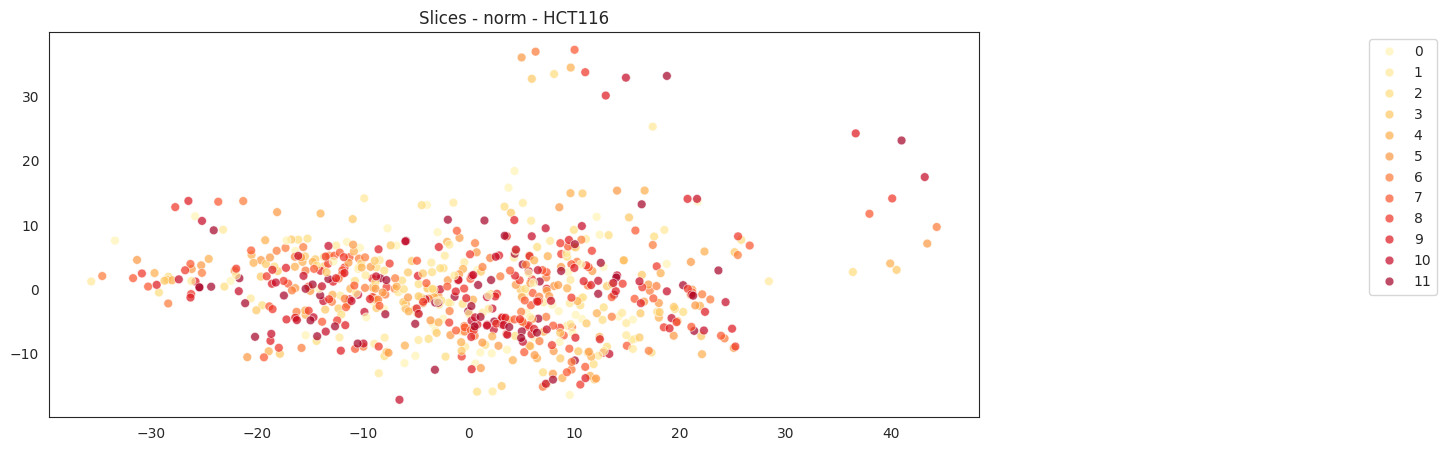

In [ ]:
## Pathways
## PCA - Pathway
fig = plt.figure(figsize=(12,5))
ax = sns.scatterplot(
    x=embedding[:, 0],
    y=embedding[:, 1],
    hue=data.Metadata_Site,
    alpha=(0.7),
    marker="o",
    palette=cmap,
    s=40,
    #size=df_toplot["Metadata_cmpd_conc"],
    #palette=pal,
    #legend=False
    )
plt.legend(bbox_to_anchor=(1.5, 1),loc='upper right')
plt.title('Slices - norm' + ' - ' + cell_line)
plt.show()
# fig.savefig(
#         "PCA_aggregates_slicenorm_{}.{}".format(cell_line, figformat), dpi=dpi, bbox_inches="tight"
#         )

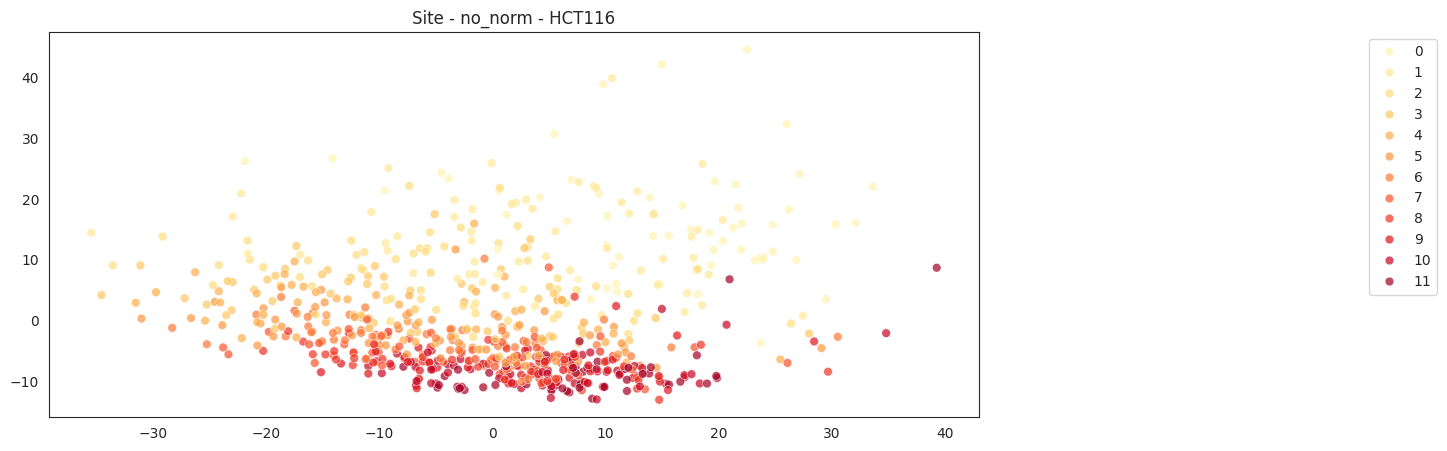

In [9]:
## PCA - Pathway
fig = plt.figure(figsize=(12,5))
ax = sns.scatterplot(
    x=embedding1[:, 0],
    y=embedding1[:, 1],
    hue=data.Metadata_Site,
    alpha=(0.7),
    marker="o",
    palette=cmap,
    s=40,
    #size=df_toplot["Metadata_cmpd_conc"],
    #palette=pal,
    #legend=False
    )
plt.legend(bbox_to_anchor=(1.5, 1),loc='upper right')
plt.title('Site - no_norm' + ' - ' + cell_line)
plt.show()
# fig.savefig(
#         "PCA_aggregates_noslicenorm_{}.{}".format(cell_line, figformat), dpi=dpi, bbox_inches="tight"
#         )

In [ ]:
Pycytominer_Aggr
import pandas as pd
import numpy as np
import os
# Pycytominer
from pycytominer import feature_select
from pycytominer import normalize
from pycytominer import aggregate
# Set current working directory
print(os.getcwd())
os.chdir('/share/data/analyses/christa/colopaint3D/spher_colo52_v1/')
print(os.getcwd())
# Some function definitions
def list_features(df):
    # List features
    list_of_selected_features = list(df.columns.values)
    list_of_metadata = list(df.columns[df.columns.str.contains("Metadata_")])
    list_of_selected_features = list(set(list_of_selected_features) - set(list_of_metadata))
    return list_of_selected_features, list_of_metadata
cell_line = 'HCT116'
OutputDir = '1_FeaturesImages_none/'
List all files in directory
dir = '1_FeaturesImages_none/SingleSlice/'
files = os.listdir(dir)
name = dir
# Select all files with HCT116 in the name as well as MedianAgg_meanstd
files = [file for file in files if cell_line in file and 'MedianAgg' in file]
# Load the parquet file into a pandas dataframe
# Load all files
data = []
for file in files:
    data.append(pd.read_parquet(dir + file))
data = pd.concat(data)
# Load metadata (I am missing the concentrations)
metadata = pd.read_csv('spher_colo52-metadata.csv')
## Prepare the metadata
dataset = data.copy()
# Merge data with metadata to get the concentrations
dataset = dataset.merge(metadata[['plate_well', 'cmpd_conc']], left_on='Metadata_PlateWell', right_on = 'plate_well')
dataset = dataset.drop(columns=['plate_well'])
dataset['Metadata_cmpd_conc'] = dataset['cmpd_conc'].rename('Metadata_cmpd_conc')
# Remove all columns with 'FileName' or 'PathName' in the name
dataset = dataset.loc[:,~dataset.columns.str.contains('FileName|PathName|ObjectNumber|ImageNumber|AcqID')]
dataset['Metadata_PlateWell'] = dataset['Metadata_Well'].astype(str) + '_' + dataset['Metadata_Barcode']
# # Add a short name for the compound
dataset['Metadata_name'] = dataset['Metadata_cmpd_cmpdname'].str[:5]
# Normalize each slice for each plate separately
dataset["Metadata_plate_slice"] = (
    dataset["Metadata_Barcode"] + "_" + dataset["Metadata_Site"].astype(str)
    )
def standardize_mean(df):
    # df = df.with_row_count('index')
    df_mean = pl.DataFrame()
    for i in range(df.select(pl.col('Metadata_Site')).max().item()):
        df_slice = df.filter(pl.col('Metadata_Site')==i)
        df_slice_DMSO=df_slice.filter(pl.col('Metadata_cmpd_cmpdname')=='dmso')
        assert df_slice_DMSO.shape[0]>0, "did not find any wells 'treated' with DMSO"
        mu = df_slice_DMSO.select(float_columns).mean()
        std = df_slice_DMSO.select(float_columns).std()
        # replace 0 with 1 (specifically not clip) to avoid div by zero
        std = std.select([pl.col(c).replace({0: 1}, default=pl.col(c)) for c in std.columns])
        for i,col in enumerate(std.columns):
            if std[col].is_null().any():
                raise RuntimeError(f"some std value in column {col,i} is nan?!")
            if std[col].is_infinite().any():
                raise RuntimeError(f"some std value in column {col,i} is infinite?!")
            if (std[col]==0).any():
                raise RuntimeError(f"unexpected 0 in column {col}")
        print_time("calculated DMSO distribution for one slice")
        df_standardized_slice = df_slice.with_columns([(pl.col(c) - mu[c]) / (std[c]+0.01) for c in mu.columns])
        found_nan=False
        # checking nans:
        for i,col in enumerate(mu.columns):
            if df_standardized_slice[col].is_null().any():
                found_nan=True
                print(f"some value in column {col,i} is nan")
        if found_nan:
            raise RuntimeError("found nan")
        df_mean_slice=df_slice.with_columns([df_standardized_slice[c] for c in df_standardized_slice.columns])
        df_mean = pl.concat([df_mean, df_mean_slice])
    # df_mean
    return df_mean
#
# Normalize separately per 1) plate and 2) cell line
#
units = dataset["Metadata_Barcode"].unique() # Per slice in each plate
# units = dataset["Metadata_plate_slice"].unique() # Per slice in each plate
# Itnitialize an empty dataframe
normalized = pd.DataFrame(columns=dataset.columns.values)
for unit in units:
    print(unit)
    # annotated_temp = dataset[dataset['Metadata_plate_slice'] == unit]
    annotated_temp = dataset[dataset['Metadata_Barcode'] == unit]
    # Normalize: choose between standardize, robustize, mad_robustize, spherize
    normalized_temp = normalize(annotated_temp,
                                features=list_features(dataset)[0],image_features=False,
                                meta_features="infer", samples="Metadata_cmpd_cmpdname == 'dmso'",
                                method="standardize")
    normalized = pd.concat([normalized, normalized_temp], ignore_index=True)
# Save the normalized data
# Feature selection: "variance_threshold", "correlation_threshold", "drop_na_columns", "blocklist", "drop_outliers", "noise_removal",
to_clip_df = feature_select(normalized, features=list_features(normalized)[0], operation=["variance_threshold", "correlation_threshold","drop_na_columns", "blocklist"])
# Instead of removing the outliers, we can clip them
selected_df = pd.concat([to_clip_df[list_features(to_clip_df)[1]], to_clip_df[list_features(to_clip_df)[0]].clip(lower=-40, upper=40, axis=1)], axis=1)
print(selected_df.shape)
selected_df.to_csv(('{}normalized_data_no_slice_{}.csv').format(OutputDir, cell_line), index=False)
# Aggregate profiles across z-slices
features = list_features(normalized)[0]
metadata_cols = [col for col in normalized.columns if col not in features + ['Metadata_Site', 'Metadata_PlateWell','Metadata_plate_slice']]
aggregated_df = normalized.groupby(['Metadata_PlateWell']).agg(
    {**{col: 'first' for col in metadata_cols},  # Keep the first occurrence of metadata columns
    **{col: 'median' for col in features}}  # Aggregate features by mean (or any other function)
).reset_index()
# Feature selection: "variance_threshold", "correlation_threshold", "drop_na_columns", "blocklist", "drop_outliers", "noise_removal",
to_clip_df = feature_select(aggregated_df, features=list_features(normalized)[0], operation=["variance_threshold", "correlation_threshold","drop_na_columns", "blocklist"])
# Instead of removing the outliers, we can clip them
selected_df = pd.concat([to_clip_df[list_features(to_clip_df)[1]], to_clip_df[list_features(to_clip_df)[0]].clip(lower=-40, upper=40, axis=1)], axis=1)
print(selected_df.shape)